In [1]:
# Check the PEP8 norm for each cell
%load_ext nb_black

<IPython.core.display.Javascript object>

P7 Description <br>

Following the data Analysis, this part select the model(s) that will be investigate (search of better hyperparameters)
The metrics selected at this step are the "Receiver Operating Characteristic Area Under the Curve" (ROC AUC or AUROC), the fbeta score and a custom score that I created according to the project needs.


$\;\;\;\;\;\;$ Imports <br>
Part 2 - Modelling <br>
$\;\;\;\;\;\;$ [Model evaluation and metrcs](#eval) <br>
$\;\;\;\;\;\;$ [Baseline](#base) <br>
$\;\;\;\;\;\;$ [Metric tests on a simple model](#metric) <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ [Summary](#sum) <br>
$\;\;\;\;\;\;$ [Model selections](#models) <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ [roc_auc](#roc) <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ [fbeta](#beta) <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ [custom](#cus) <br>

#### imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<IPython.core.display.Javascript object>

In [3]:
# col width
pd.set_option("max_colwidth", 240)
# option to be able see all columns
pd.set_option("max_columns", None)
# max lanes display
pd.options.display.max_rows = 250

<IPython.core.display.Javascript object>

In [4]:
import time

<IPython.core.display.Javascript object>

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline

<IPython.core.display.Javascript object>

In [9]:
from sklearn.preprocessing import RobustScaler

<IPython.core.display.Javascript object>

In [10]:
from sklearn import cluster, metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve

<IPython.core.display.Javascript object>

In [12]:
# Cross-validation evaluation of Supervised algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer

<IPython.core.display.Javascript object>

In [13]:
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

In [14]:
from sklearn.metrics import confusion_matrix

<IPython.core.display.Javascript object>

#### modeling

In [17]:
from statistics import mean
from numpy import std
from collections import Counter

<IPython.core.display.Javascript object>

In [18]:
# SMOTE and all
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE

<IPython.core.display.Javascript object>

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier

<IPython.core.display.Javascript object>

#### others

In [23]:
from IPython.display import Image

<IPython.core.display.Javascript object>

In [24]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

# load numpy array from csv file
from numpy import loadtxt

<IPython.core.display.Javascript object>

#### data loading

In [43]:
start = time.time()

X_train = pd.read_csv("X_train_fill_fulldb.csv", index_col=[0])
y_train = pd.read_csv("y_train.csv", index_col=[0])
X_test = pd.read_csv("X_test_nona_fulldb.csv", index_col=[0])
y_test = pd.read_csv("y_test_nona_fulldb.csv", index_col=[0])

end = time.time()
print("total time: ", (end - start), "sec")

total time:  6.57032036781311 sec


<IPython.core.display.Javascript object>

In [47]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(246005, 239) (246005, 1) (17625, 239) (17625, 1)


<IPython.core.display.Javascript object>

In [63]:
X_train["TARGET"] = y_train

<IPython.core.display.Javascript object>

In [64]:
print("before sampling :", X_train.shape)
X_train = X_train.sample(frac=0.05, random_state=6)
print("after sampling :", X_train.shape)

before sampling : (246005, 240)
after sampling : (12300, 240)


<IPython.core.display.Javascript object>

In [65]:
X_train.head(1)

,CODE_GENDER,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Maternityleave,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Incompletehigher,NAME_EDUCATION_TYPE_Lowersecondary,NAME_EDUCATION_TYPE_Secondarysecondaryspecial,NAME_FAMILY_STATUS_Civilmarriage,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Singlenotmarried,NAME_HOUSING_TYPE_Municipalapartment,NAME_HOUSING_TYPE_Rentedapartment,NAME_HOUSING_TYPE_Withparents,OCCUPATION_TYPE_Cleaningstaff,OCCUPATION_TYPE_Cookingstaff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_LowskillLaborers,OCCUPATION_TYPE_Salesstaff,OCCUPATION_TYPE_Securitystaff,OCCUPATION_TYPE_Waitersbarmenstaff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_BusinessEntityType2,ORGANIZATION_TYPE_BusinessEntityType3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Industrytype1,ORGANIZATION_TYPE_Industrytype11,ORGANIZATION_TYPE_Industrytype13,ORGANIZATION_TYPE_Industrytype3,ORGANIZATION_TYPE_Industrytype4,ORGANIZATION_TYPE_Industrytype8,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Selfemployed,ORGANIZATION_TYPE_Tradetype1,ORGANIZATION_TYPE_Tradetype3,ORGANIZATION_TYPE_Tradetype7,ORGANIZATION_TYPE_Transporttype3,ORGANIZATION_TYPE_Transporttype4,HOUSETYPE_MODE_specifichousing,HOUSETYPE_MODE_terracedhouse,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,ANNUITY_INCOME_PERC,PAYMENT_RATE,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CREDIT_DAY_OVERDUE_MEAN,BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,BURO_AMT_CREDIT_SUM_DEBT_SUM,BURO_AMT_CREDIT_SUM_OVERDUE_MEAN,BURO_CNT_CREDIT_PROLONG_SUM,BURO_CREDIT_ACTIVE_Active_MEAN,BURO_CREDIT_ACTIVE_Bad debt_MEAN,BURO_CREDIT_ACTIVE_Sold_MEAN,BURO_CREDIT_CURRENCY_currency 1_MEAN,BURO_CREDIT_CURRENCY_currency 3_MEAN,BURO_CREDIT_TYPE_Credit card_MEAN,BURO_CREDIT_TYPE_Loan for working capital replenishment_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_ENDDATE_MIN,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,ACTIVE_CREDIT_DAY_OVERDUE_MAX,ACTIVE_CREDIT_DAY_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN,ACTIVE_CNT_CREDIT_PROLONG_SUM,ACTIVE_MONTHS_BALANCE_SIZE_SUM,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MAX,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_ENDDATE_MIN,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_DAYS_CREDIT_UPDATE_MEAN,CLOSED_CREDIT_DAY_OVERDUE_MAX,CLOSED_CREDIT_DAY_OVERDUE_MEAN,CLOSED_AMT_CREDIT_MAX_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_MAX,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_SUM,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_NAME_CONTRACT_TYPE_Cash loans_MEAN,PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN,PREV_NAME_CONTRACT_TYPE_XNA_MEAN,PREV_WEEKDAY_APPR_PROCESS_S

<IPython.core.display.Javascript object>

In [66]:
y_train = X_train["TARGET"].values
X_train = X_train.drop("TARGET", axis=1)

<IPython.core.display.Javascript object>

# Part - 2 Modelling

In [67]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 11347]
 [    1   953]]


<IPython.core.display.Javascript object>

<a id='eval' />

### Evaluation of the model and metrics

In [68]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
    return scores

<IPython.core.display.Javascript object>

<a id='base' />

### Baseline

DummyClassifier makes predictions that ignore the input features. <br>
It serves as a simple baseline to compare against other classifiers.

In [69]:
# baseline
baseline = DummyClassifier(strategy="stratified")

<IPython.core.display.Javascript object>

In [70]:
scores = evaluate_model(X_train, y_train, baseline)
# summarize performance
print("Mean ROC AUC: %.3f (%.3f)" % (mean(scores), std(scores)))

Mean ROC AUC: 0.504 (0.018)


<IPython.core.display.Javascript object>

In [71]:
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)

<IPython.core.display.Javascript object>

Confusion Matrix
----------
[[14882  1322]
 [ 1301   120]]


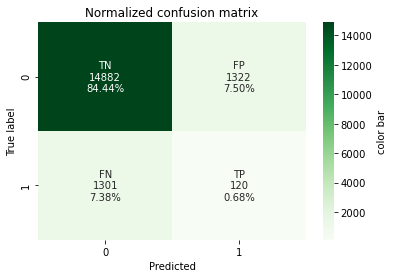

<IPython.core.display.Javascript object>

In [72]:
cm_b = confusion_matrix(y_test, y_pred, labels=[0, 1])

group_names = ["TN", "FP", "FN", "TP"]

group_counts = ["{0:0.0f}".format(value) for value in cm_b.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm_b.flatten() / np.sum(cm_b)]

labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]

labels = np.asarray(labels).reshape(2, 2)


print("Confusion Matrix")
print("--" * 5)
print(cm_b)

sns.heatmap(
    cm_b,
    cmap="Greens",
    fmt="",
    annot=labels,
    cbar_kws={"orientation": "vertical", "label": "color bar"},
    xticklabels=[0, 1],
    yticklabels=[0, 1],
)
plt.xlabel("Predicted")
plt.ylabel("True label")
plt.title("Normalized confusion matrix")
plt.show()

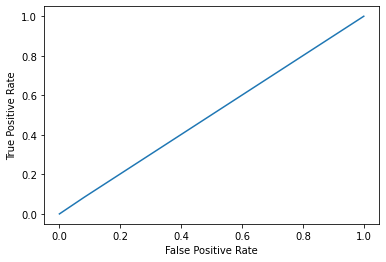

<IPython.core.display.Javascript object>

In [73]:
fpr_b, tpr_b, thresholds_b = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr_b, tpr_b)
roc_display = RocCurveDisplay(fpr=fpr_b, tpr=tpr_b).plot()

<a id='metric' />

## Metric tests on a simple model

The basic idea for this section is to evaluate the best metrics for our project. This metrics should show us a better score for algorithmes that are dealing with the class imbalanced.

In [74]:
# Fonction recap
def predic_matrix(name, model, params, score_metric):
    start_grid = time.time()

    Search = GridSearchCV(
        model, params, scoring=score_metric, n_jobs=1, cv=5, refit=True
    )

    # execute search
    Search.fit(X_train, y_train)

    end_grid = time.time()
    print("total time for the Grid Search: ", (end_grid - start_grid), "sec")
    print("--" * 5)

    best_model = Search.best_estimator_
    print("best model params:", best_model)
    print("--" * 5)

    start_fit = time.time()
    best_model.fit(X_train, y_train)
    end_fit = time.time()
    Predict_time = (round((end_fit - start_fit), 3), "sec")

    y_pred_l = best_model.predict(X_test)
    y_pred_p = best_model.predict_proba(X_test)

    Test_score = best_model.score(X_test, y_test)
    print("SCORES :")
    print("Best Score: %s" % Search.best_score_)
    print("test score :", Test_score)
    print("--" * 5)

    cm = confusion_matrix(y_test, y_pred_l, labels=[0, 1])
    group_names = ["TN", "FP", "FN", "TP"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]

    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]

    labels = np.asarray(labels).reshape(2, 2)

    print("Confusion Matrix")
    print(cm)
    print("--" * 5)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_p[:, 1], pos_label=1)
    # metrics.auc(fpr, tpr)
    # roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

    precision, recall, _ = precision_recall_curve(y_test, y_pred_p[:, 1])

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_l).ravel()

    TNR = tn / (tn + fp)
    FNR = fn / (fn + tn)

    Report = [
        name,
        score_metric,
        mean(Search.cv_results_["mean_test_score"]),
        mean(Search.cv_results_["std_test_score"]),
        mean(Search.cv_results_["mean_fit_time"]),
        mean(Search.cv_results_["std_fit_time"]),
        Predict_time,
        Test_score,
        TNR,
        FNR,
    ]

    end_tot = time.time()
    print("temps total: ", (end_tot - start_grid), "sec")

    print("A partir d'ici")
    # figure
    fig = plt.figure(figsize=(20, 6))

    # Create each subplot individually
    plt.subplot(1, 3, 1)
    sns.heatmap(
        cm,
        cmap="Greens",
        fmt="",
        annot=labels,
        # cbar_kws={"orientation": "vertical", "label": "color bar"},
        xticklabels=[0, 1],
        yticklabels=[0, 1],
    )
    plt.xlabel("Predicted")
    plt.ylabel("True label")
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Roc auc curve")

    # plt.plot([0, 1], [0, 1], color="black", linestyle="--")
    plt.subplot(1, 3, 3)
    plt.plot(recall, precision, marker=".")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Recall precision curve")

    # One Title
    plt.suptitle("Summary Plots")

    # Auto adjust
    plt.tight_layout()

    # Display
    plt.show()

    return Report, y_pred_l, y_pred_p, best_model

<IPython.core.display.Javascript object>

### Base parameters for the GridSearches !

In [75]:
# define the searching space for no classes unbalanced treatment
LR_param = dict()
LR_param["logisticregression__C"] = [1.0]
LR_param["logisticregression__solver"] = ["lbfgs"]
LR_param["logisticregression__max_iter"] = [1000]
LR_param["logisticregression__random_state"] = [18]
LR_param["logisticregression__max_iter"] = [500]

<IPython.core.display.Javascript object>

In [76]:
# define the searching space for the class balanced lR
LR_cb_param = dict()
LR_cb_param["logisticregression__C"] = [1.0]
LR_cb_param["logisticregression__solver"] = ["lbfgs"]
LR_cb_param["logisticregression__max_iter"] = [1000]
LR_cb_param["logisticregression__random_state"] = [18]
LR_cb_param["logisticregression__max_iter"] = [500]
LR_cb_param["logisticregression__class_weight"] = ["balanced"]

<IPython.core.display.Javascript object>

In [77]:
# define the searching space for SMOTE LR
LR_S_param = dict()
LR_S_param["Classifier__C"] = [1.0]
LR_S_param["Classifier__solver"] = ["lbfgs"]
LR_S_param["Classifier__max_iter"] = [1000]
LR_S_param["Classifier__random_state"] = [18]
LR_S_param["Classifier__max_iter"] = [500]

<IPython.core.display.Javascript object>

In [78]:
# Usual logisticRegression with no classes unbalance taking into account : nothing
LR = make_pipeline(
    RobustScaler(),
    LogisticRegression(),
)

<IPython.core.display.Javascript object>

In [79]:
# LogisticRegression with classes unbalance taking into account : cb
LR_cb = make_pipeline(
    RobustScaler(),
    LogisticRegression(),
)

<IPython.core.display.Javascript object>

In [80]:
# LogisticRegression with SMOTE : S
LR_S = Pipeline(
    [
        ("sadasyn", ADASYN(sampling_strategy=0.30)),
        ("oversample", SVMSMOTE(sampling_strategy=0.60)),
        ("Norm", RobustScaler()),
        ("undersampling", RandomUnderSampler()),
        ("Classifier", LogisticRegression()),
    ]
)

<IPython.core.display.Javascript object>

### ROC_AUC score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  9.442507028579712 sec
----------
best model params: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: 0.6594275535001088
test score : 0.9182978723404255
----------
Confusion Matrix
[[16175    29]
 [ 1411    10]]
----------
temps total:  11.448099136352539 sec
A partir d'ici


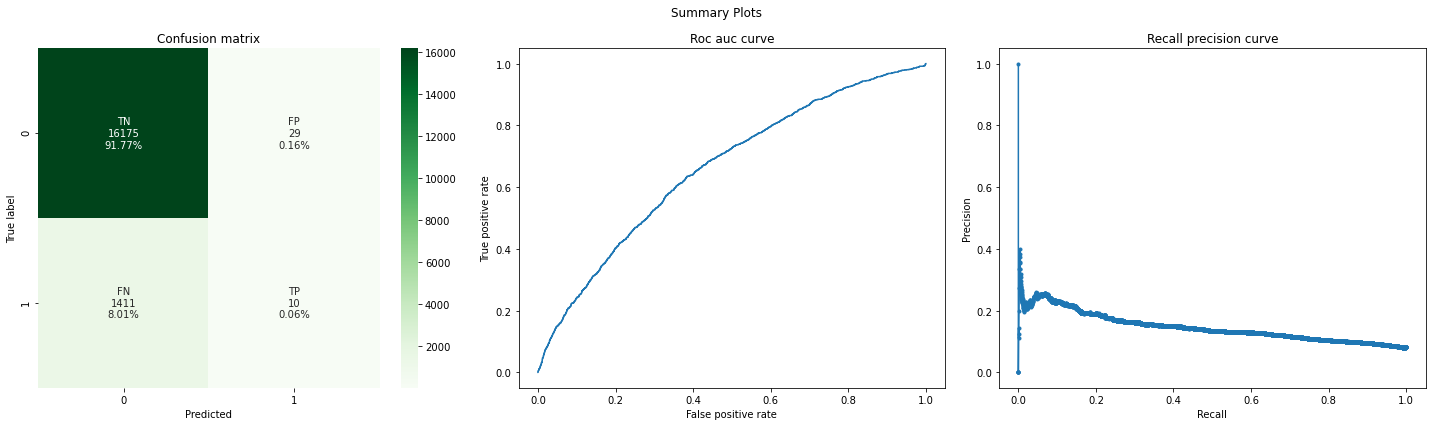

<IPython.core.display.Javascript object>

In [81]:
# Nothing
LR_report, y_pred_l_LR, y_pred_p_LR, LR_best_model = predic_matrix(
    "LR", LR, LR_param, "roc_auc"
)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  9.419593334197998 sec
----------
best model params: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: 0.6795885912656913
test score : 0.6375035460992908
----------
Confusion Matrix
[[10318  5886]
 [  503   918]]
----------
temps total:  11.485023736953735 sec
A partir d'ici


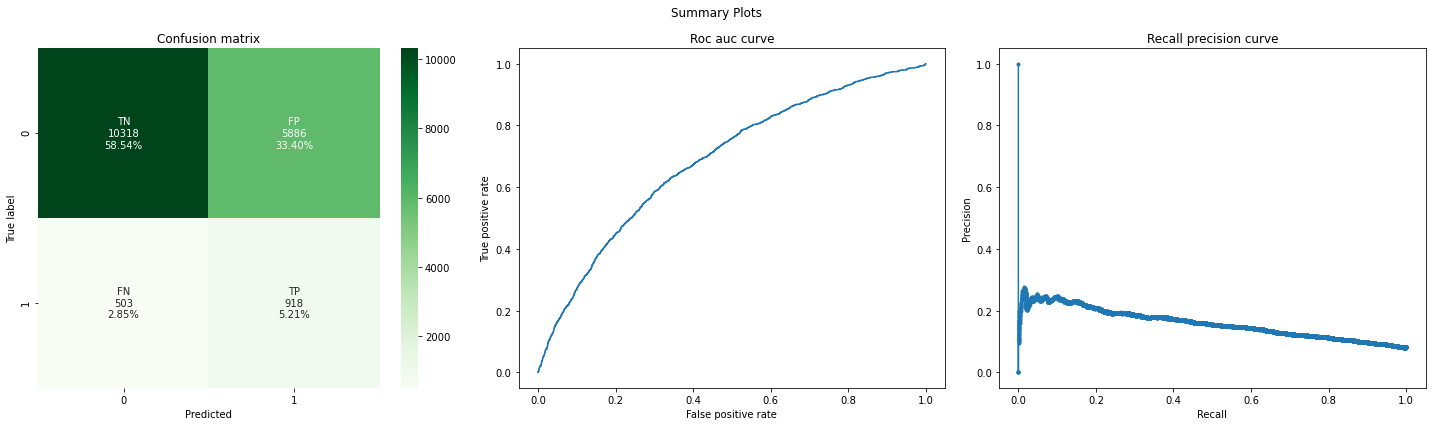

<IPython.core.display.Javascript object>

In [82]:
# Class balanced
LR_cb_report, y_pred_l_LR_cb, y_pred_p_LR_cb, LR_cb_best_model = predic_matrix(
    "LR_weight", LR_cb, LR_cb_param, "roc_auc"
)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  119.34310698509216 sec
----------
best model params: Pipeline(steps=[('sadasyn', ADASYN(sampling_strategy=0.3)),
                ('oversample', SVMSMOTE(sampling_strategy=0.6)),
                ('Norm', RobustScaler()),
                ('undersampling', RandomUnderSampler()),
                ('Classifier',
                 LogisticRegression(max_iter=500, random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: 0.6693738180172708
test score : 0.6394893617021277
----------
Confusion Matrix
[[10377  5827]
 [  527   894]]
----------
temps total:  148.49149680137634 sec
A partir d'ici


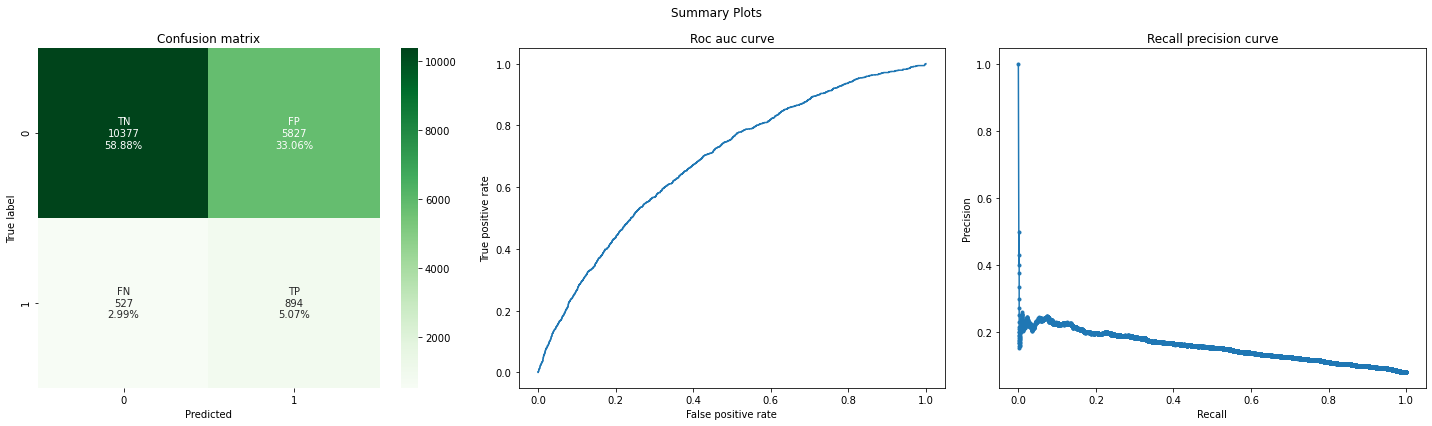

<IPython.core.display.Javascript object>

In [83]:
# SMOTE
LR_S_report, y_pred_l_LR_S, y_pred_p_LR_S, LR_S_best_model = predic_matrix(
    "LR_SMOTE", LR_S, LR_S_param, "roc_auc"
)

In [84]:
X_train.shape

(12300, 239)

<IPython.core.display.Javascript object>

In [85]:
print(y_pred_p_LR_S[0, 1])

0.5118282712221248


<IPython.core.display.Javascript object>

In [86]:
def npdescribe(array):
    print("value max :", np.amax(array))
    print("value min :", np.amin(array))
    print("value mean :", np.mean(array))
    print("value std :", np.std(array))

<IPython.core.display.Javascript object>

In [87]:
npdescribe(y_pred_p_LR_S)

value max : 1.0
value min : 0.0
value mean : 0.5
value std : 0.21703674978218374


<IPython.core.display.Javascript object>

In [88]:
npdescribe(y_pred_p_LR_cb)

value max : 1.0
value min : 2.85709017507723e-39
value mean : 0.5
value std : 0.19774801364347075


<IPython.core.display.Javascript object>

In [89]:
npdescribe(y_pred_p_LR)

value max : 1.0
value min : 0.0
value mean : 0.5
value std : 0.4208614857535279


<IPython.core.display.Javascript object>

### FBeta_score

In [90]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  9.630067110061646 sec
----------
best model params: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: 0.007800775495380536
test score : 0.9182978723404255
----------
Confusion Matrix
[[16175    29]
 [ 1411    10]]
----------
temps total:  11.636653184890747 sec
A partir d'ici


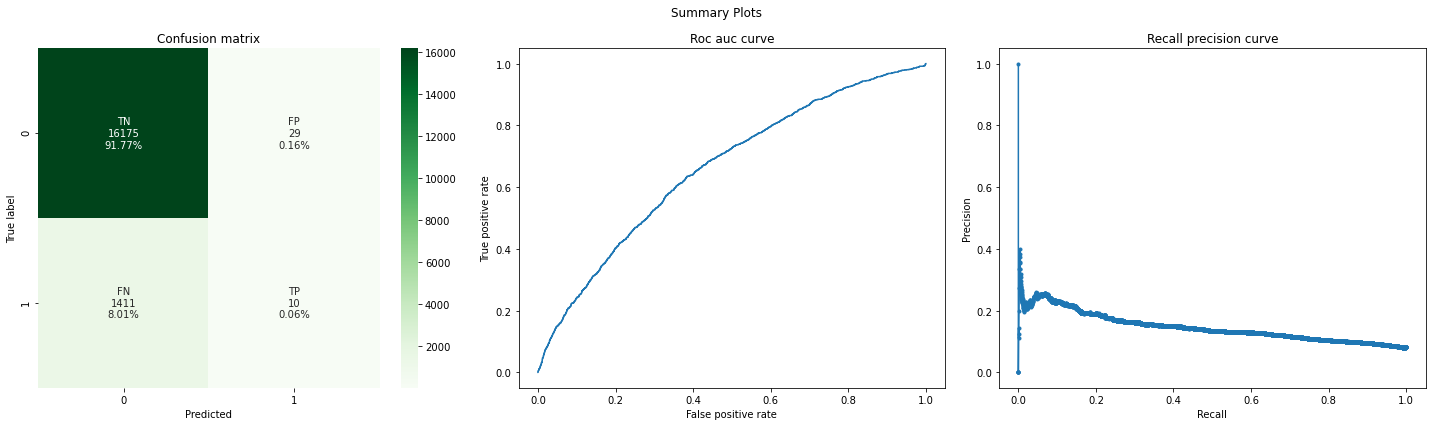

<IPython.core.display.Javascript object>

In [91]:
# Nothing
LR_report_fb, y_pred_l_LR_fb, y_pred_p_LR_fb, LR_best_model_fb = predic_matrix(
    "LR", LR, LR_param, ftwo_scorer
)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  8.929914951324463 sec
----------
best model params: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: 0.3454692117795269
test score : 0.6375035460992908
----------
Confusion Matrix
[[10318  5886]
 [  503   918]]
----------
temps total:  10.865695238113403 sec
A partir d'ici


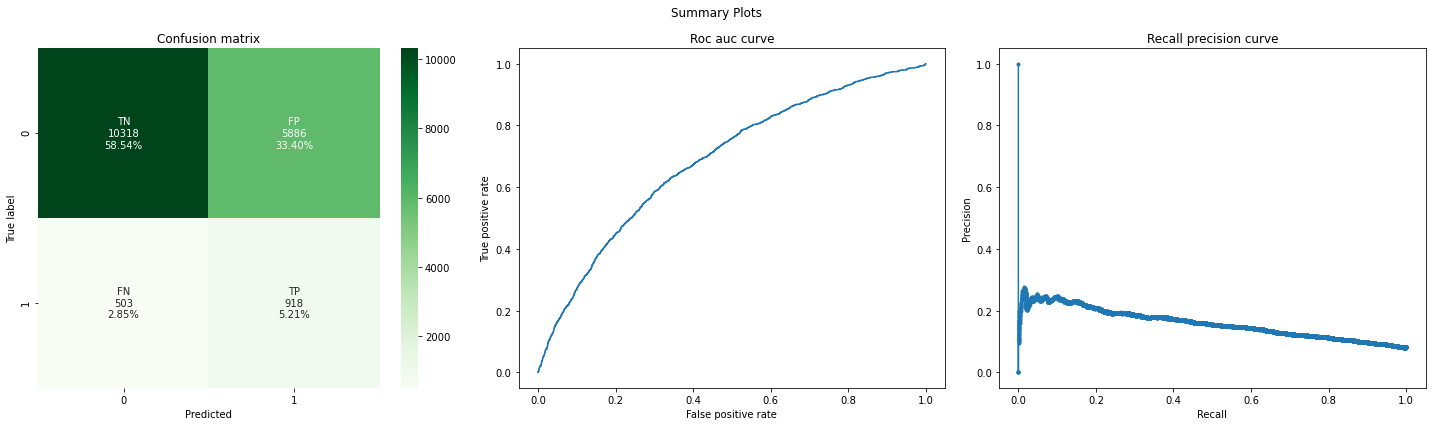

<IPython.core.display.Javascript object>

In [92]:
# Class balanced
(
    LR_cb_report_fb,
    y_pred_l_LR_cb_fb,
    y_pred_p_LR_cb_fb,
    LR_cb_best_model_fb,
) = predic_matrix("LR_weight", LR_cb, LR_cb_param, ftwo_scorer)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  117.83620619773865 sec
----------
best model params: Pipeline(steps=[('sadasyn', ADASYN(sampling_strategy=0.3)),
                ('oversample', SVMSMOTE(sampling_strategy=0.6)),
                ('Norm', RobustScaler()),
                ('undersampling', RandomUnderSampler()),
                ('Classifier',
                 LogisticRegression(max_iter=500, random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: 0.34577931568624465
test score : 0.5294184397163121
----------
Confusion Matrix
[[8369 7835]
 [ 459  962]]
----------
temps total:  145.94440054893494 sec
A partir d'ici


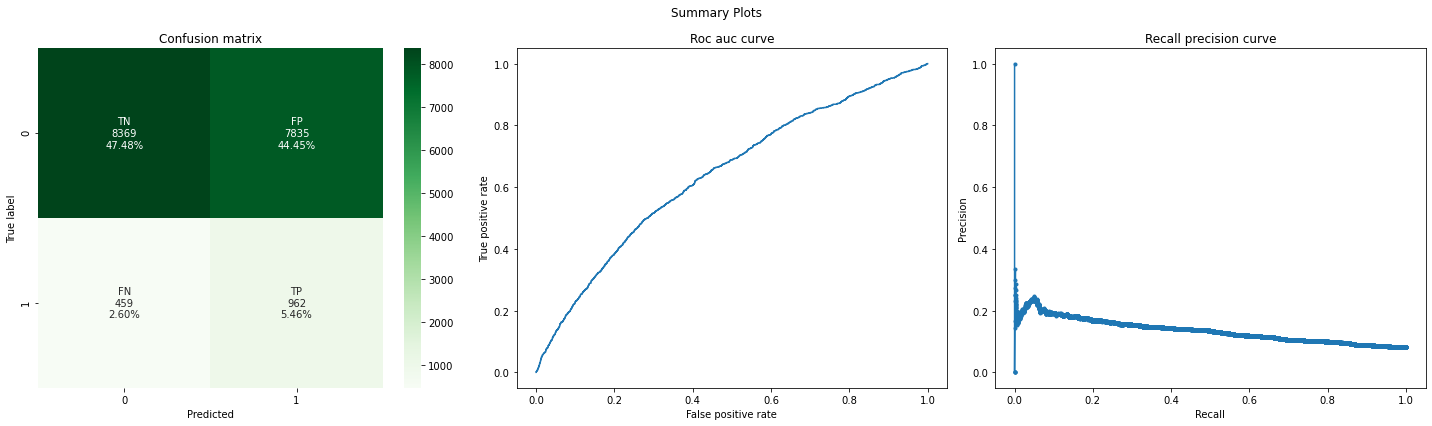

<IPython.core.display.Javascript object>

In [93]:
# Smote
LR_S_report_fb, y_pred_l_LR_S_fb, y_pred_p_LR_S_fb, LR_S_best_model_fb = predic_matrix(
    "LR_SMOTE", LR_S, LR_S_param, ftwo_scorer
)

### Custom_score

In [94]:
def fonction_metier(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return ((tn/(tn+fp)) - (33 * fn/(fn+tp)))/32

<IPython.core.display.Javascript object>

In [95]:
custom_score = make_scorer(fonction_metier, greater_is_better=True)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  9.375712871551514 sec
----------
best model params: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: -6249.0
test score : 0.9182978723404255
----------
Confusion Matrix
[[16175    29]
 [ 1411    10]]
----------
temps total:  11.342408895492554 sec
A partir d'ici


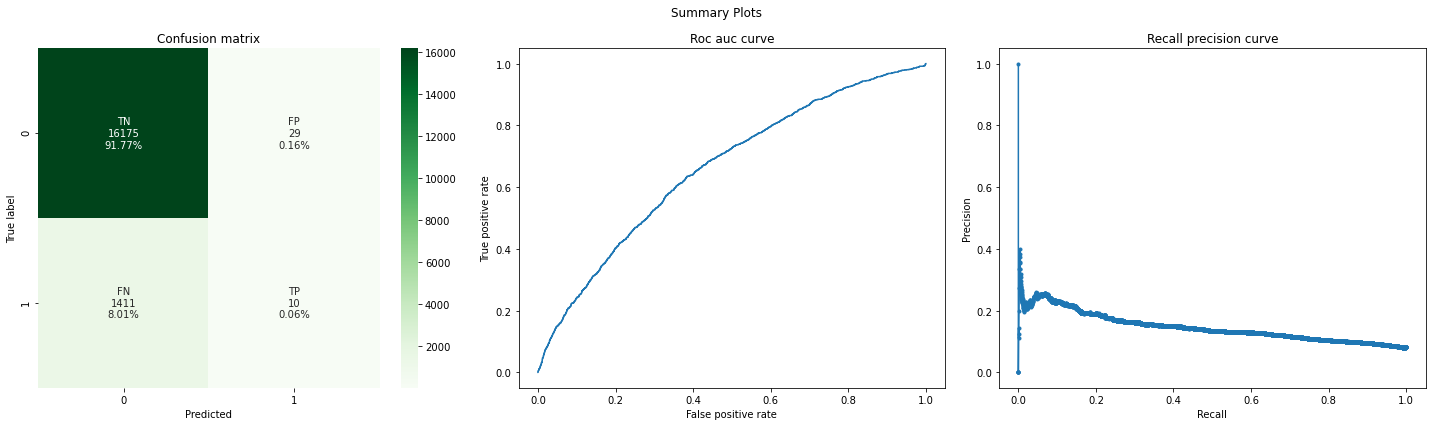

<IPython.core.display.Javascript object>

In [96]:
# Nothing
LR_report_csc, y_pred_l_LR_csc, y_pred_p_LR_csc, LR_best_model_csc = predic_matrix(
    "LR", LR, LR_param, custom_score
)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  9.001722574234009 sec
----------
best model params: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: -2420.6
test score : 0.6375035460992908
----------
Confusion Matrix
[[10318  5886]
 [  503   918]]
----------
temps total:  10.865694761276245 sec
A partir d'ici


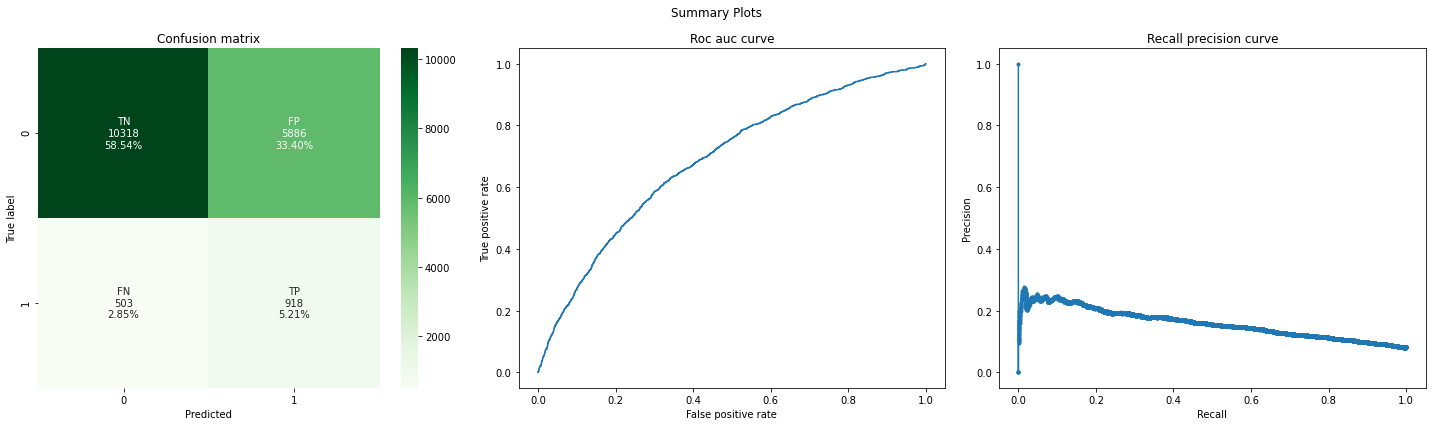

<IPython.core.display.Javascript object>

In [97]:
# Class balanced
(
    LR_cb_report_csc,
    y_pred_l_LR_cb_csc,
    y_pred_p_LR_cb_csc,
    LR_cb_best_model_csc,
) = predic_matrix("LR_weight", LR_cb, LR_cb_param, custom_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

total time for the Grid Search:  122.9863178730011 sec
----------
best model params: Pipeline(steps=[('sadasyn', ADASYN(sampling_strategy=0.3)),
                ('oversample', SVMSMOTE(sampling_strategy=0.6)),
                ('Norm', RobustScaler()),
                ('undersampling', RandomUnderSampler()),
                ('Classifier',
                 LogisticRegression(max_iter=500, random_state=18))])
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SCORES :
Best Score: -2352.6
test score : 0.6495886524822695
----------
Confusion Matrix
[[10552  5652]
 [  524   897]]
----------
temps total:  154.70876264572144 sec
A partir d'ici


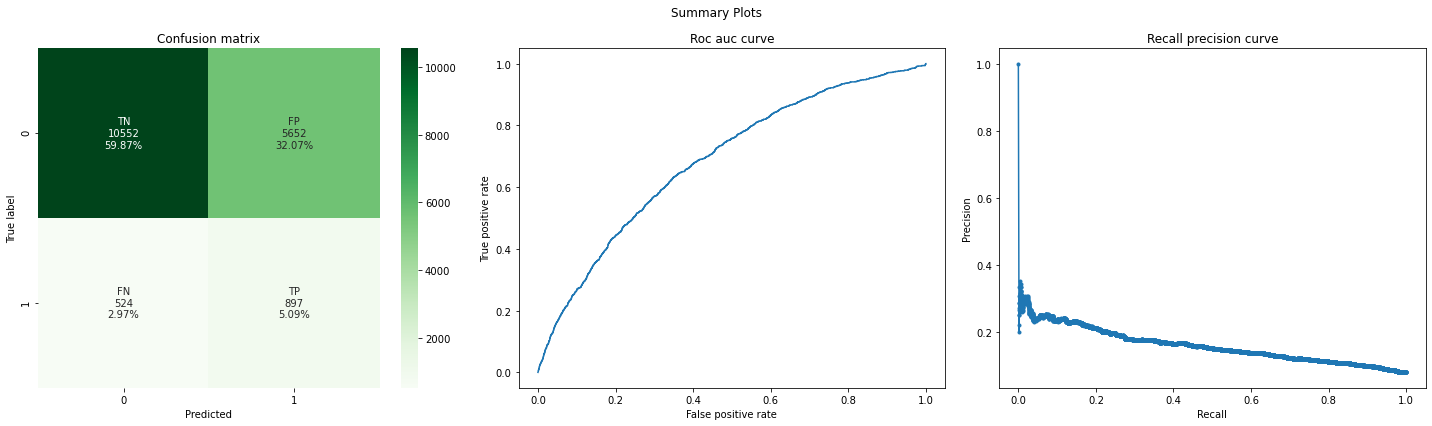

<IPython.core.display.Javascript object>

In [98]:
# Smote
(
    LR_S_report_csc,
    y_pred_l_LR_S_csc,
    y_pred_p_LR_S_csc,
    LR_S_best_model_csc,
) = predic_matrix("LR_SMOTE", LR_S, LR_S_param, custom_score)

### Comparatif

In [99]:
columns_compar = [
    "model",
    "scoring",
    "score_trains",
    "std_trains",
    "fitting_time",
    "std_fit",
    "predict_time",
    "score_test",
    "TNR",
    "FNR",
]
comparatif = [
    LR_report,
    LR_cb_report,
    LR_S_report,
    LR_report_fb,
    LR_cb_report_fb,
    LR_S_report_fb,
    LR_report_csc,
    LR_cb_report_csc,
    LR_S_report_csc,
]
df_compar = pd.DataFrame(columns=columns_compar, data=comparatif)

<IPython.core.display.Javascript object>

<a id='sum' />

### Summary of the different treatments and scores

In [100]:
df_compar

,model,scoring,score_trains,std_trains,fitting_time,std_fit,predict_time,score_test,FPR,FNR
0,LR,roc_auc,0.659428,0.008533,1.507135,0.029875,"(1.853, sec)",0.918298,0.007037,0.080234
1,LR_weight,roc_auc,0.679589,0.008046,1.484588,0.076788,"(1.908, sec)",0.637504,0.646024,0.046484
2,LR_SMOTE,roc_auc,0.669374,0.011999,18.100385,0.283883,"(28.986, sec)",0.639489,0.629134,0.048331
3,LR,"make_scorer(fbeta_score, beta=2)",0.007801,0.004848,1.526477,0.020296,"(1.852, sec)",0.918298,0.007037,0.080234
4,LR_weight,"make_scorer(fbeta_score, beta=2)",0.345469,0.008653,1.424160,0.026900,"(1.771, sec)",0.637504,0.646024,0.046484
5,LR_SMOTE,"make_scorer(fbeta_score, beta=2)",0.345779,0.011654,18.104960,0.305124,"(27.957, sec)",0.529418,0.676988,0.051994
6,LR,make_scorer(fonction_metier),-6249.000000,16.745149,1.498949,0.019638,"(1.823, sec)",0.918298,0.007037,0.080234
7,LR_weight,make_scorer(fonction_metier),-2420.600000,106.374057,1.445501,0.014665,"(1.719, sec)",0.637504,0.646024,0.046484
8,LR_SMOTE,make_scorer(fonction_metier),-2352.600000,124.406752,18.318990,0.076341,"(31.564, sec)",0.649589,0.631246,0.047309


<IPython.core.display.Javascript object>

#### As we can see, models with non balanced dealing technics are not suitable for our predictions and simple class balanced models are faster than SMOTE technics for the same results with basics parameters

<a id='models' />

### Model selections for the first step comparaison

The goal of this subpart is to select few different models (linear, non linear etc) and test them with the differents scores

In [101]:
# list of models to evaluate
def get_models():
    models, names = list(), list()
    # Linear Algorithms
    # LR_baseline
    models.append(make_pipeline(RobustScaler(), LogisticRegression(solver="lbfgs")))
    names.append("LR")
    # LR SMOTE
    models.append(
        Pipeline(
            [
                ("sadasyn", ADASYN(sampling_strategy=0.30)),
                ("oversample", SVMSMOTE(sampling_strategy=0.60)),
                ("Norm", RobustScaler()),
                ("undersampling", RandomUnderSampler()),
                ("Classifier", LogisticRegression()),
            ]
        )
    )
    names.append("LR")
    # Non linear Algorithms
    # SVM
    models.append(
        Pipeline(
            [
                ("sadasyn", ADASYN(sampling_strategy=0.30)),
                ("oversample", SVMSMOTE(sampling_strategy=0.60)),
                ("Norm", RobustScaler()),
                ("undersampling", RandomUnderSampler()),
                ("Classifier", SVC()),
            ]
        )
    )
    names.append("SVM")
    # Ensemble Algorithms
    # Bagged Decision Trees (Bagging)
    models.append(
        Pipeline(
            [
                ("sadasyn", ADASYN(sampling_strategy=0.30)),
                ("oversample", SVMSMOTE(sampling_strategy=0.60)),
                ("Norm", RobustScaler()),
                ("undersampling", RandomUnderSampler()),
                ("Classifier", BaggingClassifier()),
            ]
        )
    )
    names.append("BAG")

    # Random Forest
    models.append(
        Pipeline(
            [
                ("sadasyn", ADASYN(sampling_strategy=0.30)),
                ("oversample", SVMSMOTE(sampling_strategy=0.60)),
                ("Norm", RobustScaler()),
                ("undersampling", RandomUnderSampler()),
                ("Classifier", RandomForestClassifier()),
            ]
        )
    )
    names.append("RF")

    # Stochastic Gradient Boosting
    models.append(
        Pipeline(
            [
                ("sadasyn", ADASYN(sampling_strategy=0.30)),
                ("oversample", SVMSMOTE(sampling_strategy=0.60)),
                ("Norm", RobustScaler()),
                ("undersampling", RandomUnderSampler()),
                ("Classifier", GradientBoostingClassifier()),
            ]
        )
    )
    names.append("GBM")

    # Light gradrient booting
    models.append(
        Pipeline(
            [
                ("sadasyn", ADASYN(sampling_strategy=0.30)),
                ("oversample", SVMSMOTE(sampling_strategy=0.60)),
                ("Norm", RobustScaler()),
                ("undersampling", RandomUnderSampler()),
                ("Classifier", LGBMClassifier()),
            ]
        )
    )
    names.append("LGB")
    return models, names

<IPython.core.display.Javascript object>

In [102]:
rapid = 0
if rapid == 1:
    results_loaded = loadtxt("results_score_1.csv", delimiter=",")

<IPython.core.display.Javascript object>

<a id='roc' />

### Roc auc score

In [112]:
# evaluate a model
def evaluate_model_roc(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
    return scores

<IPython.core.display.Javascript object>

In [113]:
if rapid == 0:
    # define models
    models, names = get_models()
    results_roc = list()
    # evaluate each model
    for i in range(len(models)):

        start = time.time()
        # evaluate the model and store results
        scores = evaluate_model_roc(X_train, y_train, models[i])
        results_roc.append(scores)
        # summarize and store
        print(">%s %.3f (%.3f)" % (names[i], mean(scores), std(scores)))
        end = time.time()
        print("total time: ", (end - start), "sec")

>LR 0.556 (0.018)
total time:  5.991949081420898 sec
>LR 0.637 (0.018)
total time:  108.02961897850037 sec
>SVM 0.592 (0.020)
total time:  283.79070925712585 sec
>BAG 0.603 (0.017)
total time:  136.35765147209167 sec
>RF 0.675 (0.017)
total time:  128.10980105400085 sec
>GBM 0.684 (0.011)
total time:  216.8181128501892 sec
>LGB 0.695 (0.017)
total time:  118.6102409362793 sec


<IPython.core.display.Javascript object>

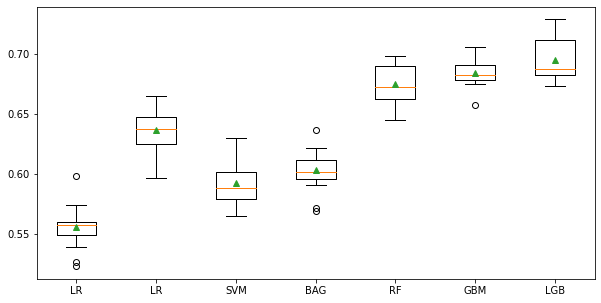

<IPython.core.display.Javascript object>

In [114]:
# plot the results
plt.figure(figsize=(10, 5))
plt.boxplot(results_roc, labels=names, showmeans=True)
plt.show()

<a id='beta' />

### fbeta score

In [106]:
# evaluate a model
def evaluate_model_fb(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=ftwo_scorer, cv=cv, n_jobs=-1)
    return scores

<IPython.core.display.Javascript object>

In [107]:
if rapid == 0:
    # define models
    models, names = get_models()
    results_fb = list()
    # evaluate each model
    for i in range(len(models)):

        start = time.time()
        # evaluate the model and store results
        scores = evaluate_model_fb(X_train, y_train, models[i])
        results_fb.append(scores)
        # summarize and store
        print(">%s %.3f (%.3f)" % (names[i], mean(scores), std(scores)))
        end = time.time()
        print("total time: ", (end - start), "sec")

>LR 0.002 (0.004)
total time:  4.03716516494751 sec
>LR 0.323 (0.017)
total time:  113.24053859710693 sec
>SVM 0.134 (0.059)
total time:  292.51178646087646 sec
>BAG 0.052 (0.017)
total time:  139.9505259990692 sec
>RF 0.020 (0.010)
total time:  130.3326234817505 sec
>GBM 0.026 (0.010)
total time:  221.53230953216553 sec
>LGB 0.051 (0.014)
total time:  120.19735980033875 sec


<IPython.core.display.Javascript object>

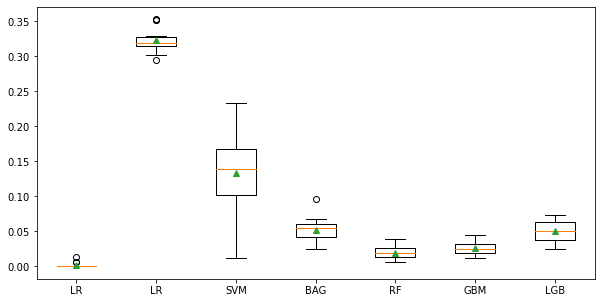

<IPython.core.display.Javascript object>

In [108]:
# plot the results
plt.figure(figsize=(10, 5))
plt.boxplot(results_fb, labels=names, showmeans=True)
plt.show()

<a id='cus' />

### Custom score

In [103]:
# evaluate a model
def evaluate_model_cus(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=custom_score, cv=cv, n_jobs=-1)
    return scores

<IPython.core.display.Javascript object>

In [104]:
if rapid == 0:
    # define models
    models, names = get_models()
    results_cus = list()
    # evaluate each model
    for i in range(len(models)):

        start = time.time()
        # evaluate the model and store results
        scores = evaluate_model_cus(X_train, y_train, models[i])
        results_cus.append(scores)
        # summarize and store
        print(">%s %.3f (%.3f)" % (names[i], mean(scores), std(scores)))
        end = time.time()
        print("total time: ", (end - start), "sec")

>LR -6280.000 (23.490)
total time:  6.08362340927124 sec
>LR -2309.000 (289.106)
total time:  110.3922472000122 sec
>SVM -5589.000 (345.863)
total time:  290.0752809047699 sec
>BAG -5945.000 (94.135)
total time:  134.69839096069336 sec
>RF -6185.000 (52.254)
total time:  128.28663992881775 sec
>GBM -6156.000 (54.770)
total time:  216.3303201198578 sec
>LGB -6008.000 (64.148)
total time:  117.78478145599365 sec


<IPython.core.display.Javascript object>

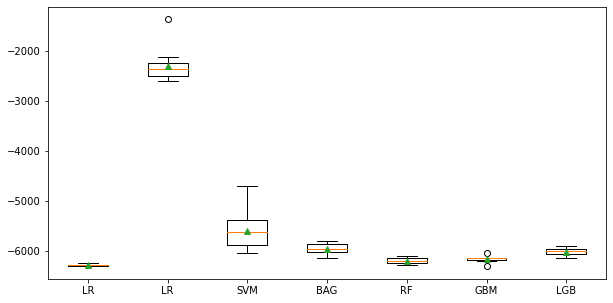

<IPython.core.display.Javascript object>

In [105]:
# plot the results
plt.figure(figsize=(10, 5))
plt.boxplot(results_cus, labels=names, showmeans=True)
plt.show()